# 6.1.28

In [3]:
import numpy as np
X = np.array([-1.3, -0.85, -0.4, 0.05,
              0.5, 0.95, 1.4, 1.85,
              2.3])

Y = np.array([-1.762, 0.955, 3.614, 4.707,
              3.721, 0.402, -3.101, -2.489,
              9.868])


In [4]:
def create_A(m):
  A = [[0 for _ in range(m+1)] for __ in range(m+1)]
  for i in range(m+1):
    for j in range(m+1):
      A[i][j] = sum([pow(x, i+j) for x in X])

  return A

def create_B(m):
  B = [0 for _ in range(m+1)]
  for i in range(m+1):
    B[i] = sum([Y[k] * pow(X[k], i) for k in range(len(X))])
  return B

def get_coeffs(A, B):
  return np.linalg.solve(A,B)

def P(m):
  A = create_A(m)
  B = create_B(m)
  coeffs = get_coeffs(A,B)
  print(coeffs)

  Y_ = []
  for i in range(len(Y)):
    Y_.append(sum([pow(X[i], k)*coeffs[k] for k in range(len(coeffs))]))

  return np.array(Y_)

def err(Y, Y_, m):
  s = 0
  for i in range(len(Y)):
    s += pow(Y[i]- Y_[i], 2)
  return np.sqrt(s/(len(Y) - m))


In [8]:
sigmas = []
for m in range(5):
  sigmas.append(err(Y, P(m), m))

[1.76833333]
[1.42661111 0.68344444]
[1.12765168 0.41166314 0.27178131]
[ 4.22028369 -4.32810802 -4.06469734  2.89098576]
[ 5.1122549   0.75395571 -7.34893687 -0.70466261  1.79782418]


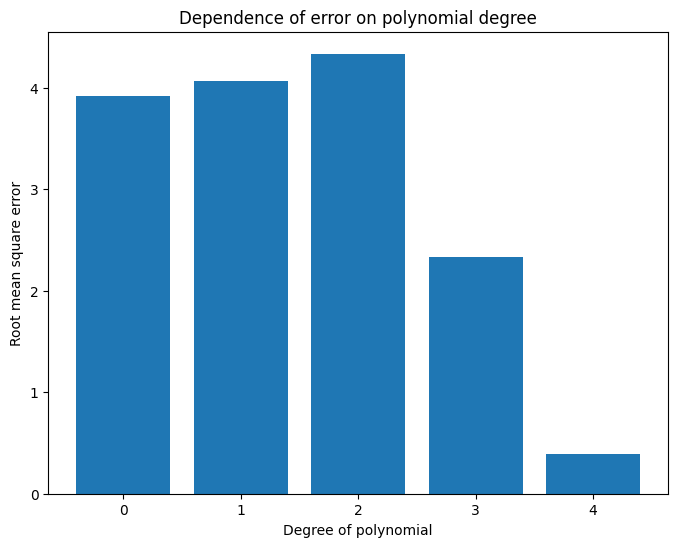

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(5), sigmas)
plt.xlabel('Degree of polynomial')
plt.ylabel('Root mean square error')
plt.title('Dependence of error on polynomial degree')
plt.show()

[1.76833333]
[1.42661111 0.68344444]
[1.12765168 0.41166314 0.27178131]
[ 4.22028369 -4.32810802 -4.06469734  2.89098576]
[ 5.1122549   0.75395571 -7.34893687 -0.70466261  1.79782418]


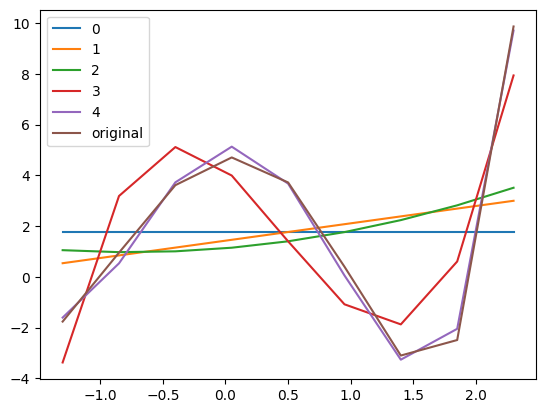

In [10]:
for m in range(5):
  plt.plot(X, P(m), label=str(m))
plt.plot(X ,Y, label='original')
plt.legend()

# 6.5.6

Коэффициенты c1 и c2:
c1 = 0.7429308984260113
c2 = -1.9116828520983833
Root mean square error: 0.6701


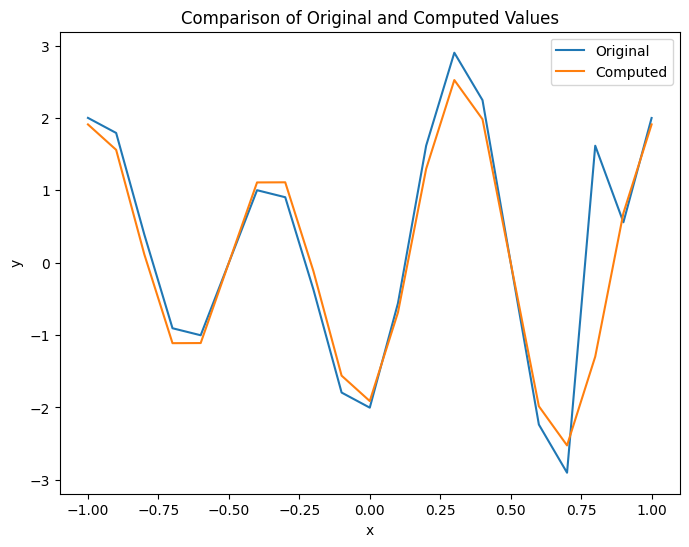

In [13]:
import numpy as np

# Значения xk
x = np.array([-1 + 0.1 * k for k in range(21)])

# Значения yk
y = np.array([2.002, 1.7937, 0.39, -0.9052, -1.0023, 0.0001, 1.0025, 0.9054, -0.37, -1.7940, -2.003, -0.5597, 1.6174, 2.9025, 2.2468, 0.001, -2.2365, -2.902, 1.6172, 0.5593, 2.0004])

# Параметры a и b
a = 2
b = 3

# Создание матрицы X
X = np.column_stack((np.sin(a * np.pi * x), np.cos(b * np.pi * x)))

# Решение системы линейных уравнений методом наименьших квадратов
c = np.linalg.lstsq(X, y, rcond=None)[0]

# Вывод результатов
print("Коэффициенты c1 и c2:")
print("c1 =", c[0])
print("c2 =", c[1])


# Вычисление значений y
y_computed = c1 * np.sin(a * np.pi * x) + c2 * np.cos(b * np.pi * x)

# Вычисление среднеквадратичной ошибки
rms_error = np.sqrt(np.mean((y - y_computed) ** 2))

print(f"Root mean square error: {rms_error:.4f}")

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original')
plt.plot(x, y_computed, label='Computed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Original and Computed Values')
plt.show()

Коэффициенты c1 и c2:
c1 = 0.742930898426011
c2 = -1.9116828520983828
Root mean square error: 0.6701


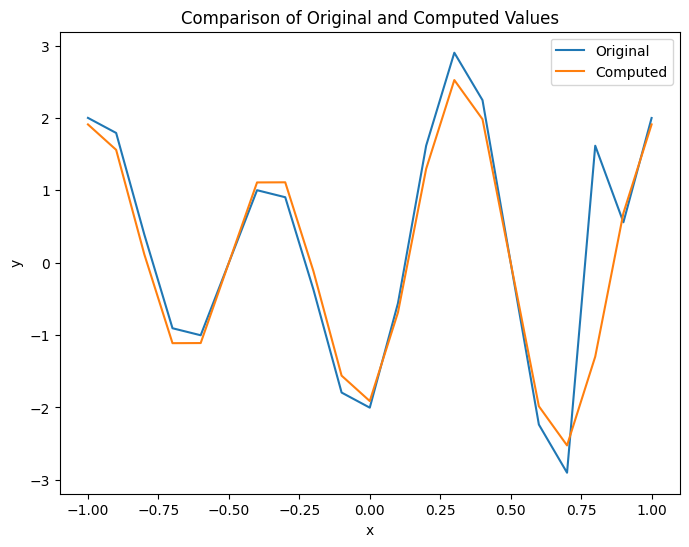

In [22]:
import numpy as np

# Значения xk
x = np.array([-1 + 0.1 * k for k in range(21)])

# Значения yk
y = np.array([2.002, 1.7937, 0.39, -0.9052, -1.0023, 0.0001, 1.0025, 0.9054, -0.37, -1.7940, -2.003, -0.5597, 1.6174, 2.9025, 2.2468, 0.001, -2.2365, -2.902, 1.6172, 0.5593, 2.0004])


a = 2
b = 3

def create_A(x, a, b):
    A = np.array([[np.sum(np.sin(a * np.pi * x) ** 2), np.sum(np.sin(a * np.pi * x) * np.cos(b * np.pi * x))],
                  [np.sum(np.sin(a * np.pi * x) * np.cos(b * np.pi * x)), np.sum(np.cos(b * np.pi * x) ** 2)]])
    return A

def create_B(x, y, a, b):
    B = np.array([np.sum(np.sin(a * np.pi * x) * y), np.sum(np.cos(b * np.pi * x) * y)])
    return B

def get_coeffs(A, B):
    return np.linalg.solve(A, B)

def compute_y(x, a, b, c1, c2):
    return c1 * np.sin(a * np.pi * x) + c2 * np.cos(b * np.pi * x)

def compute_rms_error(y, y_computed):
    return np.sqrt(np.mean((y - y_computed) ** 2))


A = create_A(x, a, b)
B = create_B(x, y, a, b)
c1, c2 = get_coeffs(A, B)

print("Коэффициенты c1 и c2:")
print("c1 =", c1)
print("c2 =", c2)

y_computed = compute_y(x, a, b, c1, c2)

rms_error = compute_rms_error(y, y_computed)

print(f"Root mean square error: {rms_error:.4f}")

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original')
plt.plot(x, y_computed, label='Computed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Original and Computed Values')
plt.show()

# 6.7.5

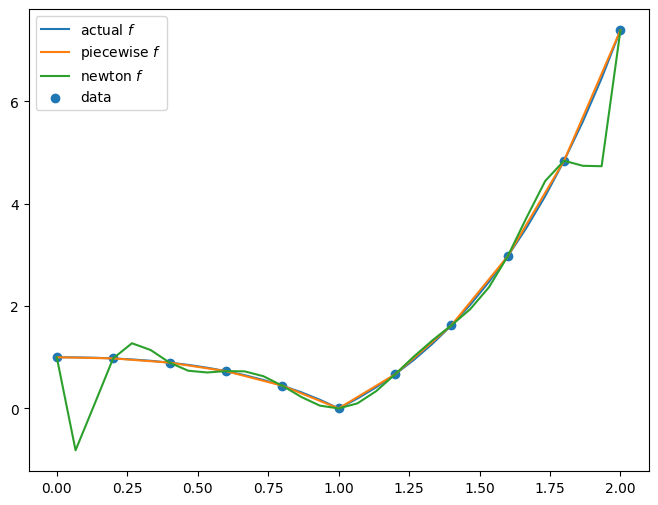

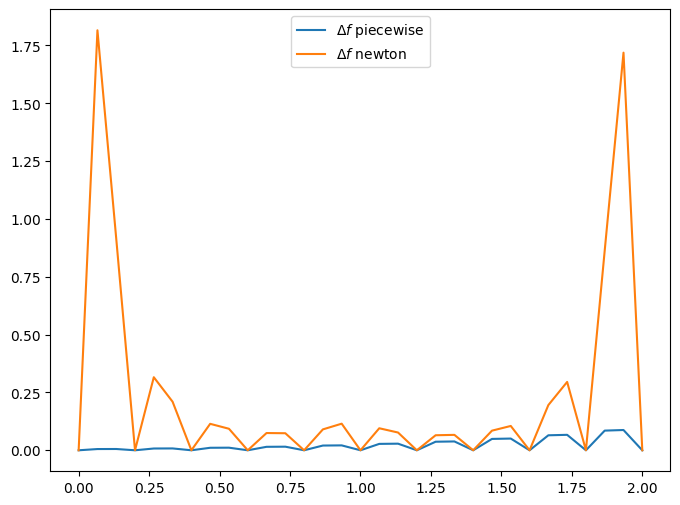

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def linear_interpolate(x0, y0, x1, y1):
    return lambda x: (y0 * (x1 - x) + y1 * (x - x0)) / (x1 - x0)


def poly_newton_coefficient(x, y):
    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])
    return a


def newton_polynomial(x_data, y_data, x):
    a = poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k]) * p
    return p


left, right = 0, 2
k = 10
step = (right - left) / k
x, wide_x = [], []
for i in range(1, k + 1):
    val = i * step
    x.append(val)
    wide_x.append(val - 2 * step / 3)
    wide_x.append(val - step / 3)
    wide_x.append(val)
x, wide_x = np.array([0.] + x), np.array([0.] + wide_x)

y = np.abs(x - 1) * np.exp(x)
wide_y = np.abs(wide_x - 1) * np.exp(wide_x)
linear_inter = []
newton_inter = np.array(newton_polynomial(x, y, wide_x))

j = 0
for i in range(k):
    f = linear_interpolate(x[i], y[i], x[i + 1], y[i + 1])
    while j < 3 * k + 1 and wide_x[j] <= x[i + 1]:
        linear_inter.append(f(wide_x[j]))
        j += 1

linear_inter = np.array(linear_inter)

plt.figure(figsize=(8, 6))
plt.plot(wide_x, wide_y, label='actual $f$')
plt.plot(wide_x, linear_inter, label='piecewise $f$')
plt.plot(wide_x, newton_inter, label='newton $f$')
plt.scatter(x, y, label='data')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(wide_x, np.abs(linear_inter - wide_y), label='$\Delta f$ piecewise')
plt.plot(wide_x, np.abs(newton_inter - wide_y), label='$\Delta f$ newton')
plt.legend()
plt.show()

# 6.9.14

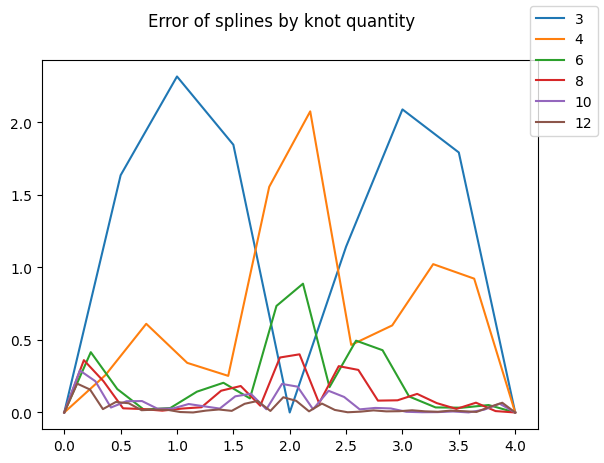

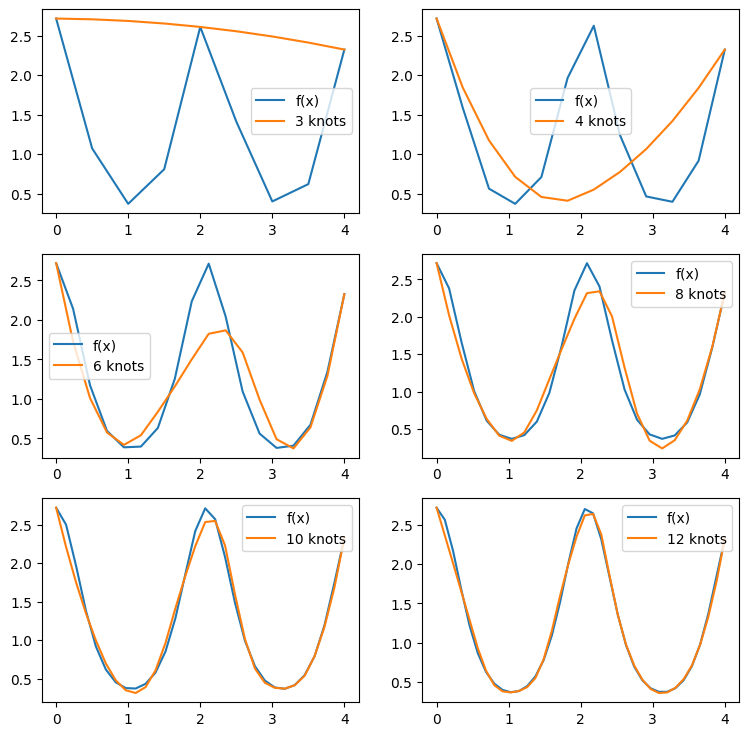

In [27]:
import numpy as np
import scipy.interpolate as intp
import matplotlib.pyplot as plt

left, right = 0, 4
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
fig2, ax2 = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
ks = [3, 4, 6, 8, 10, 12]
for i in range(6):
    k = ks[i]
    x = np.linspace(left, right, k, endpoint=True)
    wide_x = np.linspace(left, right, 3 * k, endpoint=True)
    y = np.exp(np.cos(3 * x))
    wide_y = np.exp(np.cos(3 * wide_x))
    
    poly = intp.interp1d(x, y, kind='quadratic')
    
    ax1.plot(wide_x, np.abs(wide_y - poly(wide_x)), label=f'{k}')
    ax2[i // 2][i % 2].plot(wide_x, wide_y, label='f(x)')
    ax2[i // 2][i % 2].plot(wide_x, poly(wide_x), label=f'{k} knots')
    ax2[i // 2][i % 2].legend()
    

fig1.legend()
fig1.suptitle('Error of splines by knot quantity')
plt.show()

fig2.suptitle('Splines by knot quantity')
fig2.tight_layout()
plt.show()